# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]


As ações que planejamos realizar são:

*Limpar e organizar os dados: Verificar se os dados estão corretos, se não faltam informações importantes e se estão no formato certo para análise.

*Explorar os dados: Analisar os dados para entender como os clientes usam os planos. Por exemplo, vamos ver qual é a média de minutos de ligação, mensagens e internet consumida por cada plano.

*Calcular a receita: Calcular quanto cada cliente paga por mês, levando em consideração o plano que ele usa e se ele ultrapassou os limites do plano.

*Comparar os planos: Comparar os dois planos para ver qual deles gera mais receita para a Megaline.

*Testar hipóteses:  Usar testes estatísticos para verificar se as diferenças que observamos entre os planos são realmente significativas.

## Inicialização

In [40]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



## Carregue os dados

In [41]:
# Carregue os arquivos de dados em diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

Ao abrir cada tabela em um editor de texto, pude verificar que não há problemas de delimitação ou erros nos nomes das colunas. Podemos seguir em frente.

## Planos

In [42]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
print(plans.info(show_counts=True))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [43]:
# Imprima uma amostra de dados dos planos
print(plans.sample(2))



   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  
0               20          10             0.03            0.03      surf  


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Através da amostra acima, podemos notar que nao há dados ausentes em nunhuma das colunas. Porém há problemas:a coluna mb_per_month_included está em megabytes, enquanto usd_per_gb está em gigabytes. Para facilitar a comparação e análise, seria útil converter ambas as colunas para a mesma unidade (gigabytes). Para converter de megabytes para gigabytes, podemos dividir os valores da coluna mb_per_month_included por 1024.

Os nomes das colunas são claros, mas poderiam ser um pouco mais concisos. Por exemplo, "mb_per_month_included" poderia ser simplificado para "gb_per_month_included".





## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [44]:
# Converter megabytes para gigabytes
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

# Remover a coluna 'mb_per_month_included'
plans = plans.drop('mb_per_month_included', axis=1)

#Verificar a amostra após alterações
print(plans.sample(2))






   messages_included  minutes_included  usd_monthly_pay  usd_per_gb  \
1               1000              3000               70           7   
0                 50               500               20          10   

   usd_per_message  usd_per_minute plan_name  gb_per_month_included  
1             0.01            0.01  ultimate                   30.0  
0             0.03            0.03      surf                   15.0  


## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [45]:
#Calcular o custo por gigabyte,minuto e mensagem, considerando a mensalidade e os dados inclusos, pode ajudar a comparar o valor dos planos.

#Total por GB (Estimativa):
plans['custo_gb_total'] = plans['usd_monthly_pay'] / plans['gb_per_month_included']

#Total por Min(Estimativa)
plans['custo_minuto_total'] = plans['usd_monthly_pay'] / plans['minutes_included']

#Total por Msg(Estimativa)
plans['custo_mensagem_total'] = plans['usd_monthly_pay'] / plans['messages_included']

print(plans['custo_gb_total'])
print(plans['custo_minuto_total'])
print(plans['custo_mensagem_total'])

0    1.333333
1    2.333333
Name: custo_gb_total, dtype: float64
0    0.040000
1    0.023333
Name: custo_minuto_total, dtype: float64
0    0.40
1    0.07
Name: custo_mensagem_total, dtype: float64


## Usuários

In [46]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
print(users.info(show_counts=True))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [47]:
# Imprima uma amostra de dados dos usuários
print(users.sample(50))



     user_id first_name  last_name  age  \
300     1300       Rene      Frost   23   
334     1334    Donovan     Horton   34   
336     1336      Vance   Bradshaw   34   
68      1068     Marcel    Jimenez   47   
420     1420     Season      Hardy   27   
376     1376       Mika   Williams   58   
394     1394  Alejandro     Carver   28   
337     1337     Lucius     Arnold   31   
48      1048    Linwood    Terrell   42   
445     1445     Elodia    Donovan   71   
410     1410    Wendell      Lloyd   46   
52      1052     Edmond    Hopkins   47   
175     1175     Shiloh   Stafford   25   
458     1458     Joella      Munoz   32   
89      1089     Malena     Kelley   70   
450     1450      Errol    Marquez   67   
356     1356        Hae       Ryan   46   
291     1291    Angeles      Mejia   65   
482     1482     Armand      Glenn   70   
54      1054      Denis      Frost   50   
206     1206    Angelic  Singleton   21   
397     1397     Willow     Steele   70   
67      106

[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

A coluna churn_date possui apenas 34 valores não nulos, indicando que a maioria dos usuários não cancelou o plano. Isso é esperado, pois a coluna indica a data de cancelamento.
As demais colunas possuem 500 valores não nulos, ou seja, não possuem valores faltantes.

Problemas:

A coluna reg_date e churn_date estão no formato de string. Será necessário converter essas colunas para o tipo datetime para realizar análises temporais.





### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [48]:
#Convertendo para o datetime

users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

#Visualizando após alterações

print(users.info(show_counts=True))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

A alta quantidade de valores ausentes em churn_date indica que a maioria dos usuários permanece ativa. Análises adicionais podem ser feitas para entender os fatores que levam ao cancelamento. Como por exemplo,criar uma coluna que indique se o usuário cancelou o plano (1) ou não (0).


In [49]:
users['canceled_plan'] = users['churn_date'].notna().astype(int)

print(users.info(show_counts=True))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        500 non-null    int64         
 1   first_name     500 non-null    object        
 2   last_name      500 non-null    object        
 3   age            500 non-null    int64         
 4   city           500 non-null    object        
 5   reg_date       500 non-null    datetime64[ns]
 6   plan           500 non-null    object        
 7   churn_date     34 non-null     datetime64[ns]
 8   canceled_plan  500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB
None


In [50]:
# O usuário cancelou o plano (1) ou não (0).
canceled_plan = users['canceled_plan']

print(canceled_plan.sample(50))

193    0
84     1
134    0
435    0
151    0
201    0
81     0
90     0
258    0
20     0
285    0
49     0
192    0
419    0
493    0
347    0
423    0
332    0
418    0
313    0
432    0
163    0
375    0
330    0
53     0
114    0
57     0
115    0
182    0
420    0
353    0
23     0
8      0
354    0
158    0
240    0
48     0
340    0
250    0
368    0
384    0
442    0
299    0
239    0
225    0
176    0
456    0
446    0
160    0
54     1
Name: canceled_plan, dtype: int64


## Chamadas

In [51]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
print(calls.info(show_counts=True))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [52]:
# Imprima uma amostra de dados das chamadas
print(calls.sample(50))



               id  user_id   call_date  duration
111739   1392_149     1392  2018-09-10      4.73
115969   1406_195     1406  2018-04-28      0.00
35254    1132_678     1132  2018-05-03      5.77
129017   1465_193     1465  2018-08-30     14.08
99941    1358_348     1358  2018-10-23     13.69
78200    1280_204     1280  2018-10-11      0.98
78733    1281_493     1281  2018-09-02     11.86
8304     1039_244     1039  2018-08-09      0.00
137172    1498_98     1498  2018-02-25      0.00
96893    1346_118     1346  2018-05-09     20.30
131767   1474_147     1474  2018-11-24      3.31
21714    1079_427     1079  2018-08-24      0.00
10259    1046_125     1046  2018-11-11      4.94
35568     1133_23     1133  2018-09-04      6.59
101624   1362_374     1362  2018-03-21      6.79
7546     1036_138     1036  2018-12-02      5.31
31969    1120_380     1120  2018-11-23     10.22
14391    1059_627     1059  2018-10-10     12.40
48838    1175_626     1175  2018-11-15     10.71
28719    1109_346   

[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Não há dados ausentes em nenhuma das colunas porém existem problemas. A coluna call_date está no formato de string. Será necessário converter essa coluna para o tipo datetime para realizar análises temporais.E a coluna duration possui muitos valores iguais a 0.00. Provavelmente essas chamadas não foram completadas. Será interessante analisar a porcentagem desses dados.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [53]:
#Convertendo para datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])


#Visualizando após alterações

print(calls.info(show_counts=True))

print(calls.sample(50))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None
               id  user_id  call_date  duration
58304    1210_471     1210 2018-06-17      5.46
106568   1377_120     1377 2018-11-17      5.23
16415    1064_273     1064 2018-08-17     10.44
59285    1214_354     1214 2018-07-23      0.00
113513   1399_136     1399 2018-08-04      3.74
95909    1340_259     1340 2018-10-14      9.05
100795     1360_1     1360 2018-12-23      3.63
66826    1240_684     1240 2018-08-24      0.57
131719    1474_54     1474 2018-12-17     14.67
125238   1441_122     1441 2018-11-2

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [54]:
#Podemos arredondar a duração das chamadas para cima, conforme a política da empresa.
calls['duration_rounded'] = np.ceil(calls['duration']).astype(int)

#Podemos criar uma coluna que indique se a chamada teve duração zero (1) ou não (0).
calls['call_zero'] = (calls['duration'] == 0).astype(int)

#Visualizando após alterações

print(calls.info(show_counts=True))






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   duration_rounded  137735 non-null  int64         
 5   call_zero         137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.3+ MB
None


## Mensagens

In [55]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
print(messages.info(show_counts=True))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [56]:
# Imprima uma amostra dos dados das mensagens
print(messages.sample(50))



             id  user_id message_date
48920   1327_13     1327   2018-09-30
63926   1408_51     1408   2018-03-27
15043  1101_100     1101   2018-06-30
41588   1267_99     1267   2018-12-29
52099   1336_34     1336   2018-06-15
14765   1100_87     1100   2018-10-02
58677   1373_95     1373   2018-12-16
41872  1268_245     1268   2018-09-16
50663  1329_868     1329   2018-09-20
59360  1374_534     1374   2018-06-01
19096  1123_165     1123   2018-10-08
43315  1285_174     1285   2018-08-16
42886  1281_103     1281   2018-09-03
37466   1248_30     1248   2018-12-14
25015  1147_219     1147   2018-12-31
23086  1138_110     1138   2018-06-20
45039  1302_144     1302   2018-10-23
72967  1470_595     1470   2018-09-04
70557    1460_7     1460   2018-11-10
52757    1337_1     1337   2018-11-12
65771   1424_84     1424   2018-12-09
10384  1076_872     1076   2018-11-10
33992   1214_86     1214   2018-10-28
30076   1188_94     1188   2018-11-18
41995  1270_207     1270   2018-12-16
12887  1084_

[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Nao há valores ausentes em nenhuma das colunas, porém coluna message_date está como object (string), e para analises temporais deverá ser convertida para o tipo datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [57]:
#Covertendo para datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

#Após converter para datetime
print(messages.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [58]:
#Uma forma de enriquecer os dados seria criar uma coluna que indique o período do dia em que a mensagem foi enviada (manhã, tarde, noite, madrugada)

# Extração da hora
messages['hora_mensagem'] = messages['message_date'].dt.hour

# Período do dia
def period_day(hora):
    if 6 <= hora < 12:
        return 'Morning'
    elif 12 <= hora < 18:
        return 'Afternoon'
    elif 18 <= hora < 24:
        return 'Evening'
    else:
        return 'Dawn'

# Aplicar a função à coluna de horas
messages['period_message'] = messages['hora_mensagem'].apply(period_day)

print(messages.sample(50))

              id  user_id message_date  hora_mensagem period_message
63315   1401_360     1401   2018-12-08              0           Dawn
15078   1101_135     1101   2018-07-30              0           Dawn
7735     1060_71     1060   2018-12-02              0           Dawn
8103    1061_109     1061   2018-09-30              0           Dawn
6474    1055_592     1055   2018-08-03              0           Dawn
34051   1214_145     1214   2018-07-04              0           Dawn
52879    1339_13     1339   2018-10-03              0           Dawn
46475   1316_365     1316   2018-09-29              0           Dawn
13234   1088_196     1088   2018-11-02              0           Dawn
68171    1440_37     1440   2018-12-14              0           Dawn
60250   1381_363     1381   2018-10-19              0           Dawn
47845   1324_567     1324   2018-09-29              0           Dawn
16069   1107_129     1107   2018-12-30              0           Dawn
51398   1334_116     1334   2018-0

In [59]:
#Código gerado pela revisora - todas as horas estão como 0 

messages.hora_mensagem.value_counts()

0    76051
Name: hora_mensagem, dtype: int64

## Internet

In [60]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
print(internet.info(show_counts=True))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [61]:
#  Imprima uma amostra de dados para o tráfego da internet
print(internet.sample(50))



              id  user_id session_date  mb_used
99699    1472_78     1472   2018-10-02   366.28
79694    1372_41     1372   2018-12-14   894.88
33323    1151_65     1151   2018-10-25   237.98
26366   1122_321     1122   2018-05-15    48.03
85243   1397_609     1397   2018-10-17    62.29
100379  1475_172     1475   2018-12-02   651.44
95406    1445_54     1445   2018-04-25     0.00
271      1002_86     1002   2018-11-16   938.15
98476   1465_428     1465   2018-08-31   205.31
18001    1081_60     1081   2018-07-15   405.73
91732    1425_45     1425   2018-10-02     0.00
8040    1043_102     1043   2018-09-27   354.91
52514   1236_380     1236   2018-06-23   238.26
93860   1438_102     1438   2018-10-23   262.53
58662   1263_466     1263   2018-07-20     0.00
12858   1061_355     1061   2018-05-11   765.93
21410   1099_163     1099   2018-10-31    82.27
48907    1219_17     1219   2018-12-30     0.00
103247  1494_129     1494   2018-10-30   138.80
51081    1231_10     1231   2018-08-05  

[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Sim existem problemas. A coluna session_date está no formato de string. Será necessário converter essa coluna para o tipo datetime para realizar análises temporais. 
A alta quantidade de sessões com uso de dados 0.00 pode indicar sessões não concluídas ou erros de medição. Será necessário investigar essa questão.
Arredondar os valores da coluna mb_used para cima, visto que a empresa de telefonia tem essa prática.
Converter a coluna mb_used para gigabytes, facilitará a analise, visto que o plano de dados é medido em Gigabytes.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [62]:
#Converter para date time
internet['session_date'] = pd.to_datetime(internet['session_date'])

#Converter Megabytes para Gigabytes
internet['gb_used'] = internet['mb_used'] / 1024

#Para arredondar os valores da coluna mb_used para cima
internet['gb_used'] = np.ceil(internet['gb_used']).astype(int)

#Verificando apos as alterações
print(internet.info(show_counts=True))

print(internet.sample(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB
None
              id  user_id session_date  mb_used  gb_used
26582    1123_77     1123   2018-11-30    36.73        1
82042   1384_274     1384   2018-07-21   239.65        1
19867    1090_99     1090   2018-11-11   697.56        1
70482    1329_51     1329   2018-09-10   360.33        1
67125   1312_348     1312   2018-05-27   545.18        1
71389    1333_72     1333   2018-12-14   660.20        1
58971   1264_430     1264   2018-09-13   206.62 

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [63]:
#Para enriquecer os dados podemos calcular a porcentagem de sessões com uso de dados 0.00

total_sessions = len(internet)
zero_usage_sessions = len(internet[internet['mb_used'] == 0])
zero_usage_percentage = (zero_usage_sessions / total_sessions) * 100

print(f"Porcentagem de sessões com uso de dados 0.00: {zero_usage_percentage:.2f}%")



Porcentagem de sessões com uso de dados 0.00: 13.11%


## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [64]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
print(plans)


   messages_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                 50               500               20          10   
1               1000              3000               70           7   

   usd_per_message  usd_per_minute plan_name  gb_per_month_included  \
0             0.03            0.03      surf                   15.0   
1             0.01            0.01  ultimate                   30.0   

   custo_gb_total  custo_minuto_total  custo_mensagem_total  
0        1.333333            0.040000                  0.40  
1        2.333333            0.023333                  0.07  


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [65]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

# Extrair mês e ano
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year

# Agrupar e contar chamadas
calls_per_month = calls.groupby(['user_id', 'year', 'month'])['id'].count().reset_index()
calls_per_month.rename(columns={'id': 'calls_count'}, inplace=True)

#Agrupamos o DataFrame calls pelas colunas user_id, year e month.
#Contamos o número de chamadas em cada grupo usando o método count() na coluna id.
#Renomeamos a coluna id para calls_count para melhor clareza.
#Redefinimos o índice do DataFrame resultante usando reset_index() para transformar os grupos em colunas

# Visualizar o resultado
print(calls_per_month.sample(50))


      user_id  year  month  calls_count
1828     1400  2018      9           72
1861     1405  2018     11           24
1207     1260  2018     12           60
549      1119  2018     10           49
2199     1489  2018      9           46
93       1027  2018     12           48
336      1072  2018     10           79
2092     1461  2018     11           39
1298     1283  2018     12          122
299      1066  2018      4           57
222      1053  2018     12           47
1515     1335  2018      9           61
1620     1358  2018     10           64
1755     1385  2018     10           65
458      1099  2018      5           78
402      1084  2018     11          123
87       1026  2018      8           34
553      1120  2018      5           58
1558     1345  2018     10           25
1653     1362  2018     12           90
955      1203  2018     10           89
688      1149  2018      9           33
388      1081  2018     12           28
104      1029  2018      8            7


In [66]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

# Agrupar e somar a duração das chamadas
minutes_per_month = calls.groupby(['user_id', 'year', 'month'])['duration_rounded'].sum().reset_index()
minutes_per_month.rename(columns={'duration_rounded': 'minutes_sum'}, inplace=True)

#Agrupamos o DataFrame calls pelas colunas user_id, year e month.
#Somamos a duração das chamadas em cada grupo usando o método sum() na coluna duration_rounded.
#Renomeamos a coluna duration_rounded para minutes_sum para melhor clareza.
#Redefinimos o índice do DataFrame resultante usando reset_index() para transformar os grupos em colunas.

# Visualizar o resultado
print(minutes_per_month.sample(50))


      user_id  year  month  minutes_sum
1597     1354  2018      9          462
1940     1421  2018     11          448
963      1206  2018     10          192
1576     1348  2018     10          530
1578     1348  2018     12          779
2182     1483  2018      8          424
774      1165  2018     11          124
987      1212  2018     11          314
659      1144  2018      4          163
667      1144  2018     12          517
1686     1368  2018     10          501
2148     1474  2018     10          248
1029     1222  2018      8          526
931      1199  2018      8          394
2100     1465  2018      7          752
910      1195  2018     10          688
12       1004  2018      7          381
218      1053  2018      8          479
1624     1359  2018      3          480
1258     1272  2018     11           30
2208     1490  2018     12          368
272      1061  2018     10          694
175      1044  2018      9          346
567      1122  2018     11          375


In [67]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

# Extrair mês e ano
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year

# Agrupar e contar mensagens
messages_per_month = messages.groupby(['user_id', 'year', 'month'])['id'].count().reset_index()
messages_per_month.rename(columns={'id': 'messages_count'}, inplace=True)

#Agrupamos o DataFrame messages pelas colunas user_id, year e month.
#Contamos o número de mensagens em cada grupo usando o método count() na coluna id.
#Renomeamos a coluna id para messages_count para melhor clareza.
#Redefinimos o índice do DataFrame resultante usando reset_index() para transformar os grupos em colunas

# Visualizar o resultado
print(messages_per_month.sample(50))



      user_id  year  month  messages_count
974      1257  2018     10              30
209      1064  2018      8              15
1363     1364  2018      8              12
489      1133  2018      9              90
166      1056  2018     10              28
735      1196  2018      7              28
164      1056  2018      8              37
1031     1268  2018      7              35
789      1211  2018      9              50
797      1212  2018     11              31
1603     1439  2018      8              70
1260     1339  2018      8              76
73       1028  2018     10              73
1668     1458  2018      7               6
5        1001  2018     12              44
775      1206  2018      7              22
1354     1362  2018      8              71
100      1036  2018      8              77
1391     1373  2018     10              75
543      1145  2018      6              44
1333     1358  2018      6               3
39       1015  2018     12              68
1378     13

In [68]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

# Extrair mês e ano
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year


# Agrupar e somar o uso de dados
internet_per_month = internet.groupby(['user_id', 'year', 'month'])['gb_used'].sum().reset_index()
internet_per_month.rename(columns={'gb_used': 'gb_used_sum'}, inplace=True)

#Extraímos o mês e o ano da coluna session_date e criamos novas colunas chamadas month e year.
#Agrupamos o DataFrame internet pelas colunas user_id, year e month.
#Somamos o uso de dados em cada grupo usando o método sum() na coluna gb_used.
#Renomeamos a coluna gb_used para gb_used_sum para melhor clareza.
#Redefinimos o índice do DataFrame resultante usando reset_index() para transformar os grupos em colunas.

# Visualizar o resultado
print(internet_per_month.sample(50))




      user_id  year  month  gb_used_sum
824      1171  2018     12           58
988      1206  2018      8           68
2014     1434  2018     10           33
1068     1224  2018      8           56
1285     1272  2018     11            7
1692     1364  2018     12           43
1339     1288  2018     11           37
1258     1264  2018      6           38
967      1201  2018     10           65
1913     1408  2018     11           44
434      1091  2018     10            6
1385     1299  2018      9           47
1195     1254  2018      8           56
1721     1370  2018      9           27
1104     1235  2018     11           24
1949     1417  2018      7           54
1782     1385  2018      7           41
1742     1375  2018     12           38
1910     1408  2018      8           41
36       1009  2018     12           50
1122     1239  2018     11           36
1724     1370  2018     12           40
1376     1297  2018     11           27
2067     1446  2018     11           49


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [69]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

# Juntar os DataFrames
monthly_usage = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'year', 'month'], how='outer')
monthly_usage = pd.merge(monthly_usage, messages_per_month, on=['user_id', 'year', 'month'], how='outer')
monthly_usage = pd.merge(monthly_usage, internet_per_month, on=['user_id', 'year', 'month'], how='outer')

# Preencher valores ausentes com 0
# Preenchemos os valores ausentes (NaN) com 0, pois a ausência de um valor indica que o usuário não utilizou aquele serviço naquele mês.

monthly_usage.fillna(0, inplace=True)

#Convertemos as colunas de contagem e soma para o tipo inteiro, pois representam quantidades.
# Converter tipos de dados
monthly_usage['calls_count'] = monthly_usage['calls_count'].astype(int)
monthly_usage['minutes_sum'] = monthly_usage['minutes_sum'].astype(int)
monthly_usage['messages_count'] = monthly_usage['messages_count'].astype(int)
monthly_usage['gb_used_sum'] = monthly_usage['gb_used_sum'].astype(int)



# Exibir o DataFrame resultante
print(monthly_usage)



      user_id  year  month  calls_count  minutes_sum  messages_count  \
0        1000  2018     12           16          124              11   
1        1001  2018      8           27          182              30   
2        1001  2018      9           49          315              44   
3        1001  2018     10           65          393              53   
4        1001  2018     11           64          426              36   
...       ...   ...    ...          ...          ...             ...   
2288     1349  2018     12            0            0              61   
2289     1361  2018      5            0            0               2   
2290     1482  2018     10            0            0               2   
2291     1108  2018     12            0            0               0   
2292     1311  2018      6            0            0               0   

      gb_used_sum  
0               4  
1              21  
2              41  
3              50  
4              49  
...           .

In [70]:
# Adicione as informações sobre o plano

# Mesclar monthly_usage com users
monthly_usage = pd.merge(monthly_usage, users[['user_id', 'plan', 'city']], on='user_id', how='left')

# Mesclar monthly_usage com plans
monthly_usage = pd.merge(monthly_usage, plans, left_on='plan', right_on='plan_name', how='left')


# Mesclamos monthly_usage com users usando pd.merge() e a coluna user_id como chave. Usamos how='left' para manter todos os registros de monthly_usage.
# Selecionamos apenas as colunas user_id, plan e city do DataFrame users para evitar a duplicação de colunas com o mesmo nome.
# Mesclamos o DataFrame resultante com plans usando pd.merge() e a coluna plan como chave. Usamos how='left' para manter todos os registros de monthly_usage.
# Usamos left_on='plan' e right_on='plan_name' para especificar que a coluna plan em monthly_usage corresponde à coluna plan_name em plans

# Visualizar o resultado
print(monthly_usage)


      user_id  year  month  calls_count  minutes_sum  messages_count  \
0        1000  2018     12           16          124              11   
1        1001  2018      8           27          182              30   
2        1001  2018      9           49          315              44   
3        1001  2018     10           65          393              53   
4        1001  2018     11           64          426              36   
...       ...   ...    ...          ...          ...             ...   
2288     1349  2018     12            0            0              61   
2289     1361  2018      5            0            0               2   
2290     1482  2018     10            0            0               2   
2291     1108  2018     12            0            0               0   
2292     1311  2018      6            0            0               0   

      gb_used_sum      plan                                       city  \
0               4  ultimate      Atlanta-Sandy Springs-Roswel

[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [71]:
# Calcule a receita mensal para cada usuário

# Criamos funções para calcular os custos adicionais de chamadas, mensagens e internet, considerando os limites de cada plano.
def calculate_call_overage(row):
    overage = row['minutes_sum'] - row['minutes_included']
    if overage > 0:
        return overage * row['usd_per_minute']
    else:
        return 0

def calculate_message_overage(row):
    overage = row['messages_count'] - row['messages_included']
    if overage > 0:
        return overage * row['usd_per_message']
    else:
        return 0

def calculate_internet_overage(row):
    overage = row['gb_used_sum'] - row['gb_per_month_included']
    if overage > 0:
        return overage * row['usd_per_gb']
    else:
        return 0
    
# Aplicamos as funções ao DataFrame para calcular os custos adicionais

monthly_usage['call_overage'] = monthly_usage.apply(calculate_call_overage, axis=1)
monthly_usage['message_overage'] = monthly_usage.apply(calculate_message_overage, axis=1)
monthly_usage['internet_overage'] = monthly_usage.apply(calculate_internet_overage, axis=1)

# Calculamos a receita total para cada usuário, somando a mensalidade e os custos adicionais.

monthly_usage['total_revenue'] = monthly_usage['usd_monthly_pay'] + monthly_usage['call_overage'] + monthly_usage['message_overage'] + monthly_usage['internet_overage']

# Visualizar o resultado
print(monthly_usage)
 




      user_id  year  month  calls_count  minutes_sum  messages_count  \
0        1000  2018     12           16          124              11   
1        1001  2018      8           27          182              30   
2        1001  2018      9           49          315              44   
3        1001  2018     10           65          393              53   
4        1001  2018     11           64          426              36   
...       ...   ...    ...          ...          ...             ...   
2288     1349  2018     12            0            0              61   
2289     1361  2018      5            0            0               2   
2290     1482  2018     10            0            0               2   
2291     1108  2018     12            0            0               0   
2292     1311  2018      6            0            0               0   

      gb_used_sum      plan                                       city  \
0               4  ultimate      Atlanta-Sandy Springs-Roswel

In [91]:
monthly_usage['total_revenue'].value_counts()

70.00     171
20.00     144
140.00     37
210.00     37
154.00     32
         ... 
211.71      1
111.62      1
170.03      1
371.74      1
384.62      1
Name: total_revenue, Length: 836, dtype: int64

In [101]:
monthly_usage.query('user_id==1001')

,user_id,month,duration_rounded,messages,gb_used,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,custo_gb_total,custo_minuto_total,custo_mensagem_total,total_revenue,city,ny_nj
720,1001,8,182.0,30.0,21.0,surf,50,500,20,10,0.03,0.03,surf,15.0,1.333333,0.04,0.4,80.00,"Seattle-Tacoma-Bellevue, WA MSA",0
721,1001,9,315.0,44.0,41.0,surf,50,500,20,10,0.03,0.03,surf,15.0,1.333333,0.04,0.4,280.00,"Seattle-Tacoma-Bellevue, WA MSA",0
722,1001,10,393.0,53.0,50.0,surf,50,500,20,10,0.03,0.03,surf,15.0,1.333333,0.04,0.4,370.09,"Seattle-Tacoma-Bellevue, WA MSA",0
723,1001,11,426.0,36.0,49.0,surf,50,500,20,10,0.03,0.03,surf,15.0,1.333333,0.04,0.4,360.00,"Seattle-Tacoma-Bellevue, WA MSA",0
724,1001,12,412.0,44.0,55.0,surf,50,500,20,10,0.03,0.03,surf,15.0,1.333333,0.04,0.4,420.00,"Seattle-Tacoma-Bellevue, WA MSA",0


<AxesSubplot:ylabel='Frequency'>

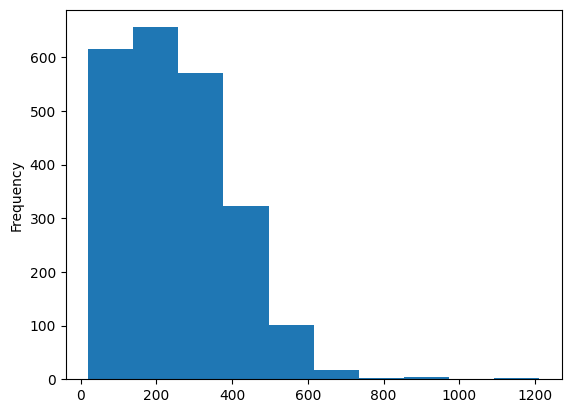

In [90]:
monthly_usage['total_revenue'].plot(kind='hist')

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>
    
    
Sugestão alternativa de como realizar a receita mensal:

```python

# Calcule a receita mensal para cada usuário

# Criando uma função para calcular a receita
def calcular_receita(row):
    # Inicializar o custo com o preço mensal do plano
    receita = row['usd_monthly_pay']
    
    # Calcular o custo adicional de minutos
    if row['total_minutes'] > row['minutes_included']:
        minutos_excedentes = row['total_minutes'] - row['minutes_included']
        receita += minutos_excedentes * row['usd_per_minute']
    
    # Calcular o custo adicional de mensagens
    if row['total_messages'] > row['messages_included']:
        mensagens_excedentes = row['total_messages'] - row['messages_included']
        receita += mensagens_excedentes * row['usd_per_message']
    
    # Calcular o custo adicional de MB
    if row['total_mb_used'] > row['mb_per_month_included']:
        mb_excedentes = row['total_mb_used'] - row['mb_per_month_included']
        receita += (mb_excedentes / 1024) * row['usd_per_gb']  # Convertendo MB para GB e multiplicando pelo custo
    
    return receita

# Aplicar a função para calcular a receita para cada usuário
df_aggregated['monthly_revenue'] = df_aggregated.apply(calcular_receita, axis=1)

# Verificar o resultado
df_aggregated[['user_id', 'year_month', 'monthly_revenue']].head()

```

## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

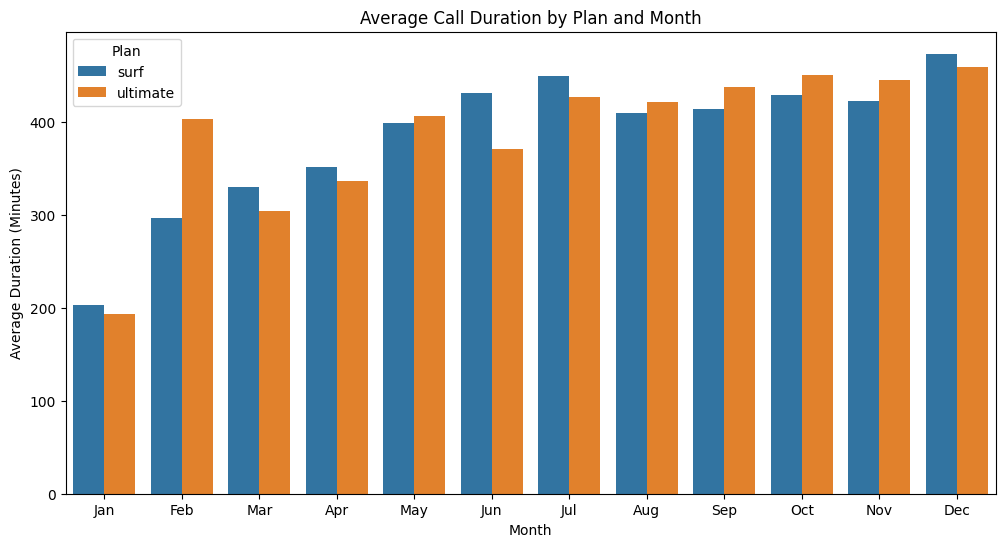

In [72]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

# Agrupar por plano e mês e calcular a média da duração das chamadas
average_call_duration = monthly_usage.groupby(['plan', 'month'])['minutes_sum'].mean().reset_index()

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='minutes_sum', hue='plan', data=average_call_duration)
plt.title('Average Call Duration by Plan and Month')
plt.xlabel('Month')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Plan')
plt.show()



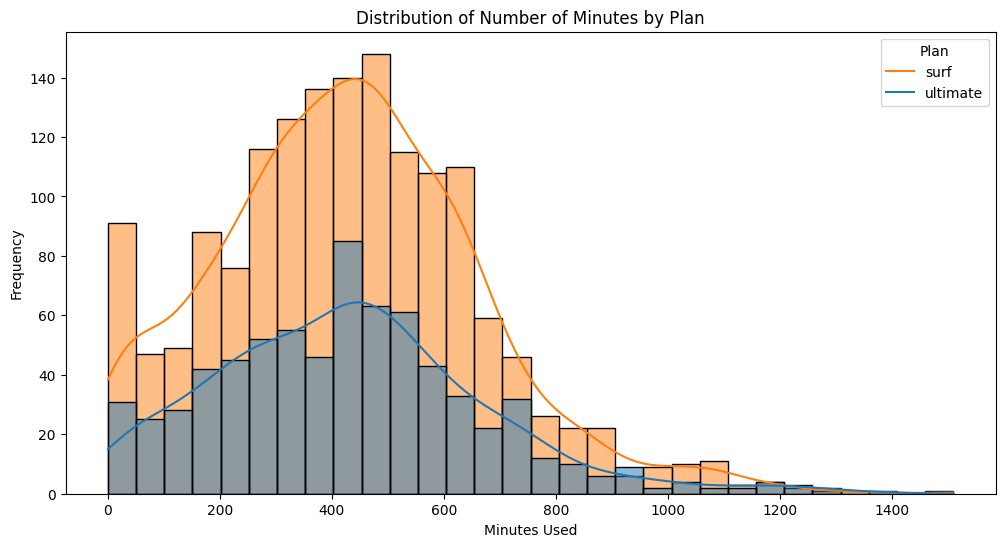

In [73]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

# Criar histogramas para cada plano
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_usage, x='minutes_sum', hue='plan', kde=True, bins=30)
plt.title('Distribution of Number of Minutes by Plan')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')
plt.legend(title='Plan', labels=['surf', 'ultimate'])
plt.show()


[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [74]:
# Calcule a média e a variância da duração mensal das chamadas

# Calcular média e variância para cada plano
call_duration_stats = monthly_usage.groupby('plan')['minutes_sum'].agg(['mean', 'var']).reset_index()

# Exibir o resultado
print(call_duration_stats)



       plan        mean           var
0      surf  428.749523  54968.279461
1  ultimate  430.450000  57844.464812


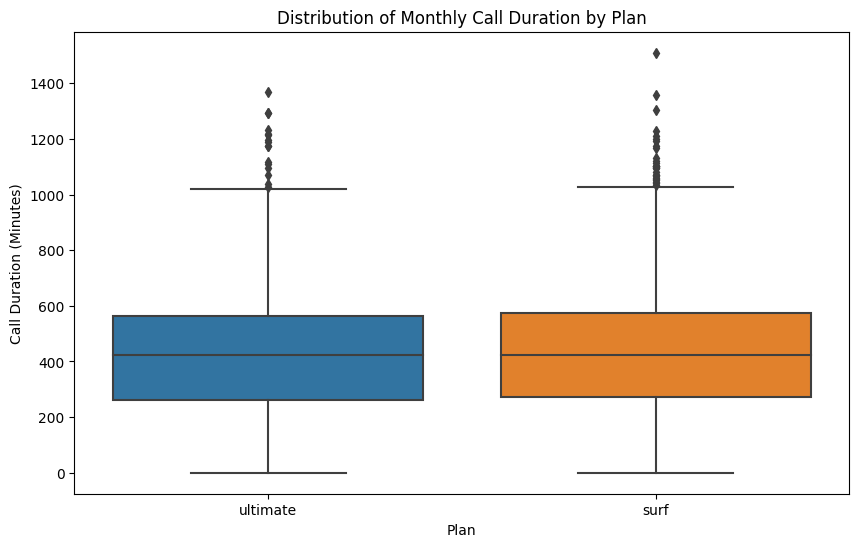

In [75]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas


plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='minutes_sum', data=monthly_usage)
plt.title('Distribution of Monthly Call Duration by Plan')
plt.xlabel('Plan')
plt.ylabel('Call Duration (Minutes)')
plt.show()


[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

Sim.Podemos observar que os usuários de ambos os planos apresentam uma ampla gama de padrões de uso de chamadas.
O plano "ultimate" atrai usuários com uma tendência para durações ligeiramente maiores e uma maior variedade nos padrões de uso.
A presença de Outliers nos dois planos mostra que existem clientes que fazem muito mais ligações que a maioria.


### Mensagens

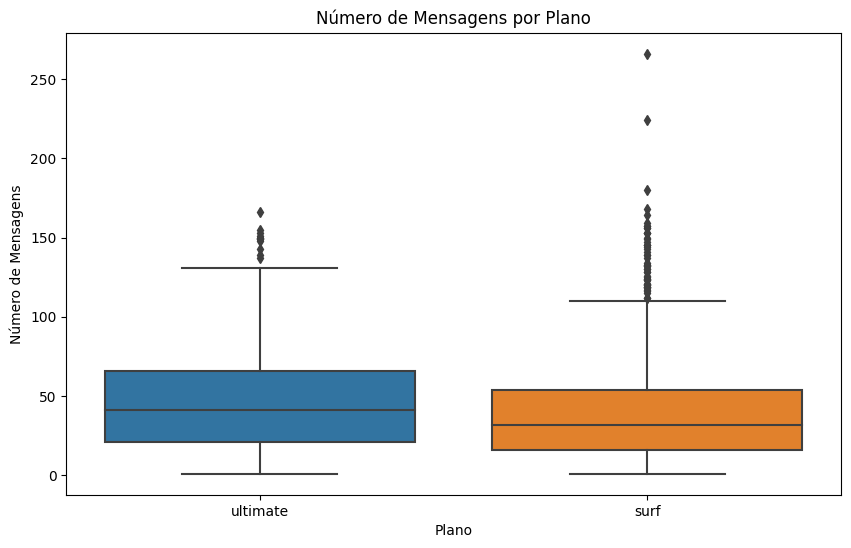

           count       mean        std  min   25%   50%   75%    max
plan                                                                
surf      1222.0  40.109656  33.035500  1.0  16.0  32.0  54.0  266.0
ultimate   584.0  46.296233  32.942118  1.0  21.0  41.0  66.0  166.0


In [76]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

# Extrair o mês da data da mensagem
messages['month'] = messages['message_date'].dt.month

# Agrupar mensagens por usuário e mês, contando o número de mensagens
messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_month = messages_per_month.rename(columns={'id': 'messages_count'})

# Combinar com informações do plano
messages_per_month = messages_per_month.merge(users[['user_id', 'plan']], on='user_id')

# Comparar o número de mensagens por plano usando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='messages_count', data=messages_per_month)
plt.title('Número de Mensagens por Plano')
plt.xlabel('Plano')
plt.ylabel('Número de Mensagens')
plt.show()

# Estatísticas descritivas por plano
print(messages_per_month.groupby('plan')['messages_count'].describe())




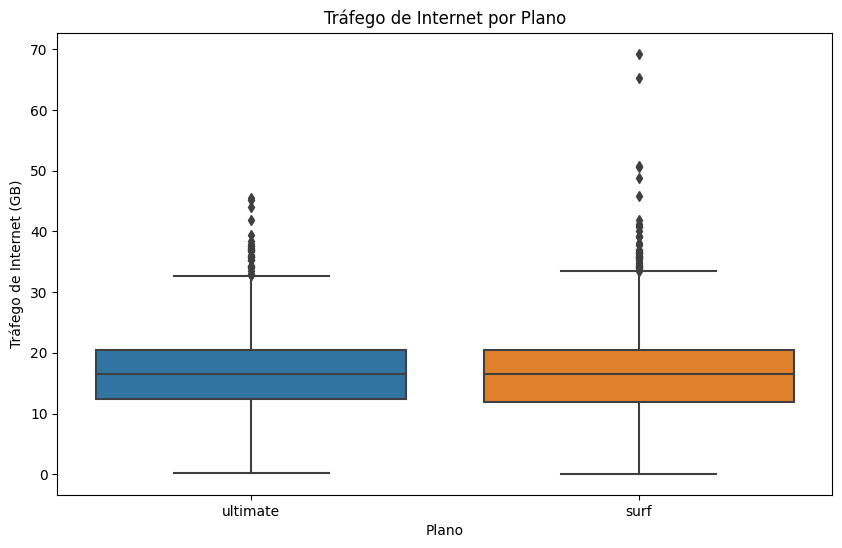

           count       mean       std       min       25%        50%  \
plan                                                                   
surf      1558.0  16.325881  7.699886  0.090146  11.90230  16.527178   
ultimate   719.0  16.834612  7.647479  0.227705  12.37415  16.468213   

                75%        max  
plan                            
surf      20.546738  69.269131  
ultimate  20.532378  45.503252  


In [77]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

# Extrair o mês da data da sessão de internet
internet['month'] = internet['session_date'].dt.month

# Agrupar o tráfego de internet por usuário e mês, somando o tráfego
internet_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_per_month = internet_per_month.rename(columns={'mb_used': 'mb_used_sum'})

# Converter MB para GB
internet_per_month['gb_used_sum'] = internet_per_month['mb_used_sum'] / 1024


# Combinar com informações do plano
internet_per_month = internet_per_month.merge(users[['user_id', 'plan']], on='user_id')

# Comparar o tráfego de internet por plano usando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='gb_used_sum', data=internet_per_month)
plt.title('Tráfego de Internet por Plano')
plt.xlabel('Plano')
plt.ylabel('Tráfego de Internet (GB)')
plt.show()

# Estatísticas descritivas por plano
print(internet_per_month.groupby('plan')['gb_used_sum'].describe())






In [78]:
print(internet.sample(50))

             id  user_id session_date  mb_used  gb_used  month  year
54601   1247_16     1247   2018-08-11   636.58        1      8  2018
73761  1346_345     1346   2018-10-13   135.61        1     10  2018
69951   1327_91     1327   2018-12-01     0.00        0     12  2018
68107   1317_57     1317   2018-11-29   402.59        1     11  2018
46186    1205_1     1205   2018-12-04   919.08        1     12  2018
21946  1100_150     1100   2018-11-26   739.37        1     11  2018
88629  1408_348     1408   2018-04-07     0.00        0      4  2018
52076  1233_156     1233   2018-12-14   757.88        1     12  2018
35332   1160_36     1160   2018-12-01    97.06        1     12  2018
17263  1077_383     1077   2018-02-19   822.83        1      2  2018
58653  1263_457     1263   2018-07-06   184.90        1      7  2018
86576  1402_105     1402   2018-12-19   183.21        1     12  2018
39054  1175_115     1175   2018-10-24    36.37        1     10  2018
54213  1246_114     1246   2018-08

[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

Similaridade no Consumo Médio:

O consumo médio de tráfego de internet é muito similar entre os usuários dos planos "surf" e "ultimate". Isso sugere que, em média, os usuários de ambos os planos têm necessidades de internet semelhantes.

Variação e Outliers:

Apesar da similaridade na média, o plano "surf" apresenta uma maior variação no consumo de internet. Isso é evidenciado pela presença de mais outliers, indicando que alguns usuários do plano "surf" consomem uma quantidade excepcionalmente alta de dados.

Essa maior variação no plano "surf" pode ser atribuída a diferentes fatores, como:
Usuários com necessidades de internet mais intensas.
Uso de aplicativos ou serviços que consomem muitos dados.
Compartilhamento de internet com outros dispositivos.

Comportamento Diferente Dependendo do Plano:

Embora o consumo médio seja parecido, o comportamento dos usuários em relação ao consumo de internet parece ser diferente dependendo do plano.
Os usuários do plano "surf" tendem a apresentar uma maior diversidade no consumo, com alguns usuários consumindo muito mais dados do que a média.
Já os usuários do plano "ultimate" apresentam um consumo mais homogêneo, com menos outliers e uma distribuição mais uniforme dos dados.

### Internet

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

- A quantidade de tráfego de internet consumido pelos usuários por plano foi analisada, mas também Aqui era possível realizar uma análise semelhante a essa: 
    
    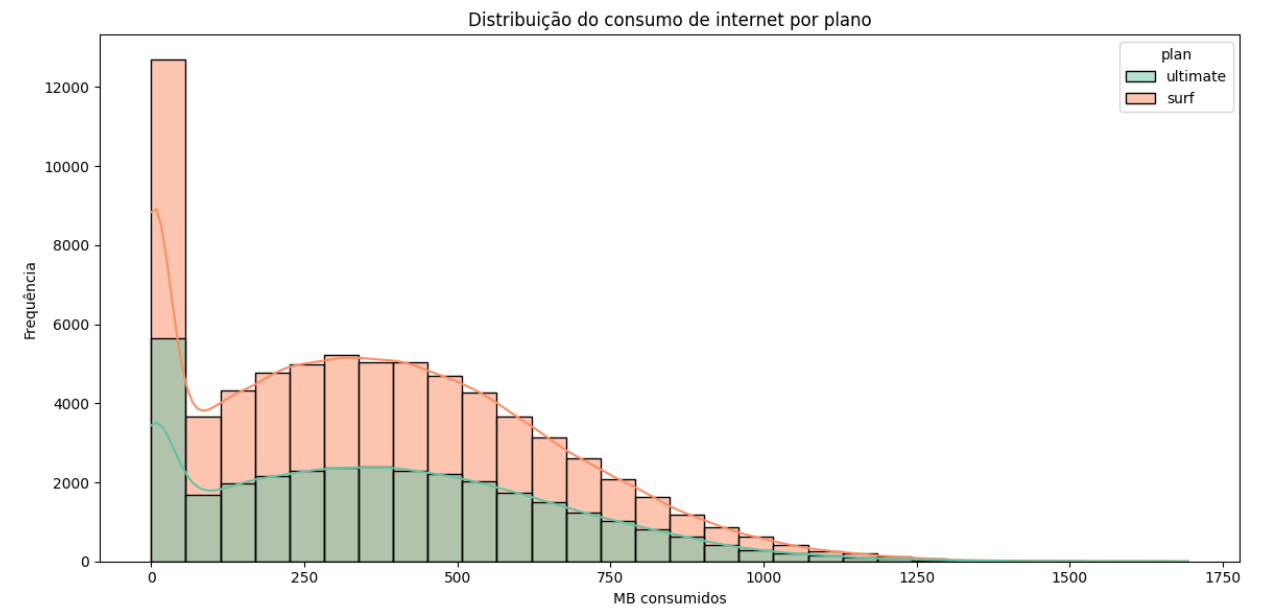
    
Como fazer: 
    
```python
plt.figure(figsize=(12, 6))
sns.histplot(data=df_internet_with_plans, x='mb_used', hue='plan', kde=True, bins=30, palette="Set2")
plt.title('Distribuição do consumo de internet por plano')
plt.xlabel('MB consumidos')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()
```
</div>

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [82]:
# Cálculo da Receita Mensal

# Extrair mês e ano das datas
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month

# Agrupar dados por usuário e mês
calls_grouped = calls.groupby(['user_id', 'month'])['duration_rounded'].sum().reset_index()
messages_grouped = messages.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id': 'messages'})
internet_grouped = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()

# Combinar dados agrupados
monthly_usage = calls_grouped.merge(messages_grouped, on=['user_id', 'month'], how='outer')
monthly_usage = monthly_usage.merge(internet_grouped, on=['user_id', 'month'], how='outer')

# Preencher valores ausentes com 0
monthly_usage = monthly_usage.fillna(0)

# Combinar com informações do plano
monthly_usage = monthly_usage.merge(users[['user_id', 'plan']], on='user_id')
monthly_usage = monthly_usage.merge(plans, left_on='plan', right_on='plan_name')

# Função para calcular a receita mensal
def calculate_revenue(row):
    minutes_exceeded = max(0, row['duration_rounded'] - row['minutes_included'])
    messages_exceeded = max(0, row['messages'] - row['messages_included'])
    gb_exceeded = max(0, row['gb_used'] - row['gb_per_month_included'])

    minutes_cost = minutes_exceeded * row['usd_per_minute']
    messages_cost = messages_exceeded * row['usd_per_message']
    gb_cost = gb_exceeded * row['usd_per_gb']

    return row['usd_monthly_pay'] + minutes_cost + messages_cost + gb_cost

# Calcular a receita mensal
monthly_usage['total_revenue'] = monthly_usage.apply(calculate_revenue, axis=1)

In [96]:
monthly_usage

,user_id,month,duration_rounded,messages,gb_used,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,custo_gb_total,custo_minuto_total,custo_mensagem_total,total_revenue,city,ny_nj
0,1000,12,124.0,11.0,4.0,ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,2.333333,0.023333,0.07,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA",0
1,1006,11,10.0,15.0,7.0,ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,2.333333,0.023333,0.07,70.00,"San Francisco-Oakland-Berkeley, CA MSA",0
2,1006,12,59.0,139.0,62.0,ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,2.333333,0.023333,0.07,294.00,"San Francisco-Oakland-Berkeley, CA MSA",0
3,1008,10,476.0,21.0,48.0,ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,2.333333,0.023333,0.07,196.00,"Orlando-Kissimmee-Sanford, FL MSA",0
4,1008,11,446.0,37.0,56.0,ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,2.333333,0.023333,0.07,252.00,"Orlando-Kissimmee-Sanford, FL MSA",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,62.0,79.0,surf,50,500,20,10,0.03,0.03,surf,15.0,1.333333,0.040000,0.40,660.36,"San Jose-Sunnyvale-Santa Clara, CA MSA",0
2289,1194,12,0.0,56.0,64.0,surf,50,500,20,10,0.03,0.03,surf,15.0,1.333333,0.040000,0.40,510.18,"San Jose-Sunnyvale-Santa Clara, CA MSA",0
2290,1349,10,0.0,76.0,27.0,surf,50,500,20,10,0.03,0.03,surf,15.0,1.333333,0.040000,0.40,140.78,"Boston-Cambridge-Newton, MA-NH MSA",0
2291,1349,11,0.0,72.0,34.0,surf,50,500,20,10,0.03,0.03,surf,15.0,1.333333,0.040000,0.40,210.66,"Boston-Cambridge-Newton, MA-NH MSA",0


In [83]:
# Descrição Estatística da Receita

# Separar receitas por plano
revenue_surf = monthly_usage[monthly_usage['plan'] == 'surf']['total_revenue']
revenue_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['total_revenue']

# Estatísticas descritivas
print("Receita do plano Surf:")
print(revenue_surf.describe())

print("\nReceita do plano Ultimate:")
print(revenue_ultimate.describe())


Receita do plano Surf:
count    1573.000000
mean      282.117724
std       163.239312
min        20.000000
25%       173.510000
50%       290.000000
75%       390.000000
max      1210.370000
Name: total_revenue, dtype: float64

Receita do plano Ultimate:
count    720.000000
mean     166.629167
std       87.318976
min       70.000000
25%       84.000000
50%      154.000000
75%      217.000000
max      532.000000
Name: total_revenue, dtype: float64


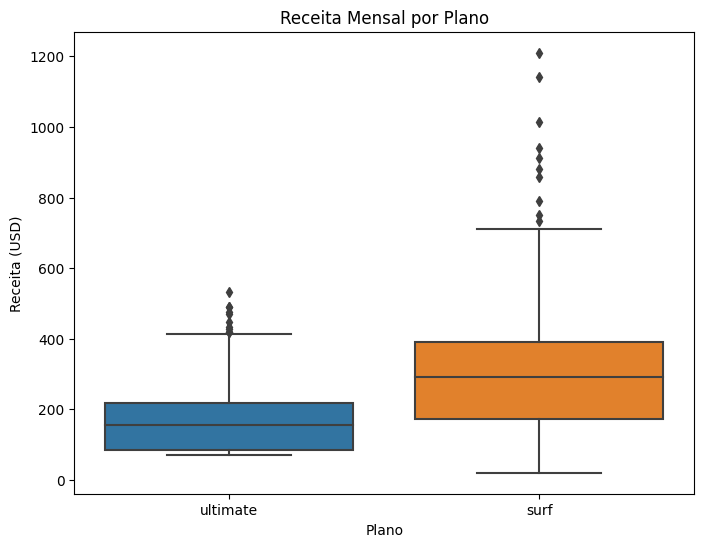

In [84]:
#  Comparação entre Planos (Visual)

# Boxplot para comparar a receita
plt.figure(figsize=(8, 6))
sns.boxplot(x='plan', y='total_revenue', data=monthly_usage)
plt.title('Receita Mensal por Plano')
plt.xlabel('Plano')
plt.ylabel('Receita (USD)')
plt.show()

[Formule conclusões sobre como a receita difere entre os planos.]

Conclusões sobre a Diferença na Receita entre os Planos:

Receita Média:
O plano "surf" gera uma receita média mensal significativamente maior do que o plano "ultimate". Isso indica que, em média, os usuários do plano "surf" contribuem mais para a receita da empresa.

Variação na Receita:
A receita gerada pelos usuários do plano "surf" apresenta uma maior variação em comparação com o plano "ultimate". Isso significa que a receita dos usuários do plano "surf" é mais dispersa, com alguns usuários gerando receitas muito altas e outros gerando receitas mais baixas.

Outliers:
O plano "surf" apresenta uma quantidade significativa de outliers, indicando que alguns usuários desse plano geram receitas excepcionalmente altas. Esses outliers podem ser atribuídos a usuários que consomem grandes quantidades de dados excedentes ou que utilizam serviços adicionais.

Número de Usuários:
O plano "surf" tem um número consideravelmente maior de usuários do que o plano "ultimate". Esse maior número de usuários contribui para a maior receita total gerada pelo plano "surf".

Padrões de Consumo:
A diferença na receita entre os planos pode ser atribuída a diferentes padrões de consumo dos usuários. Os usuários do plano "surf" podem ter necessidades de internet mais intensas ou podem utilizar serviços que consomem mais dados, resultando em cobranças adicionais.

Rentabilidade:
Com base na receita média e no número de usuários, o plano "surf" parece ser mais rentável para a empresa do que o plano "ultimate". No entanto, é importante considerar outros fatores, como os custos de aquisição e retenção de clientes, para uma análise completa da rentabilidade.


Valor Mínimo:
Apesar da receita média do plano surf ser maior, o plano ultimate possui um valor mínimo de receita maior, o que pode ser interessante para a empresa, por garantir uma receita mínima por usuário








## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [85]:
# Teste as hipóteses

# Separar receitas por plano
revenue_surf = monthly_usage[monthly_usage['plan'] == 'surf']['total_revenue']
revenue_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['total_revenue']

# Teste de Levene para verificar a igualdade das variâncias
levene_stat, levene_p = stats.levene(revenue_surf, revenue_ultimate)
print(f"Teste de Levene: p-valor = {levene_p:.4f}")

# Teste t de Student
if levene_p > 0.05:
    # Variâncias iguais
    t_stat, p_value = stats.ttest_ind(revenue_surf, revenue_ultimate, equal_var=True)
    print("Teste t (variâncias iguais):")
else:
    # Variâncias diferentes
    t_stat, p_value = stats.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)
    print("Teste t (variâncias diferentes):")

print(f"p-valor = {p_value:.4f}")

# Comparar o p-valor com o valor alfa
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. A receita média dos planos é diferente.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a receita média dos planos é diferente.")

Teste de Levene: p-valor = 0.0000
Teste t (variâncias diferentes):
p-valor = 0.0000
Rejeitamos a hipótese nula. A receita média dos planos é diferente.


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [86]:
# Teste as hipóteses


# Combinar com o DataFrame 'users' para obter a coluna 'city'
monthly_usage = monthly_usage.merge(users[['user_id', 'city']], on='user_id')

# Criar coluna para identificar usuários de NY-NJ
monthly_usage['ny_nj'] = monthly_usage['city'].apply(lambda x: 1 if 'NY-NJ' in x else 0)

# Separar receitas por região
revenue_ny_nj = monthly_usage[monthly_usage['ny_nj'] == 1]['total_revenue']
revenue_other = monthly_usage[monthly_usage['ny_nj'] == 0]['total_revenue']

# Teste de Levene para verificar a igualdade das variâncias
levene_stat, levene_p = stats.levene(revenue_ny_nj, revenue_other)
print(f"Teste de Levene: p-valor = {levene_p:.4f}")

# Teste t de Student
if levene_p > 0.05:
    # Variâncias iguais
    t_stat, p_value = stats.ttest_ind(revenue_ny_nj, revenue_other, equal_var=True)
    print("Teste t (variâncias iguais):")
else:
    # Variâncias diferentes
    t_stat, p_value = stats.ttest_ind(revenue_ny_nj, revenue_other, equal_var=False)
    print("Teste t (variâncias diferentes):")

print(f"p-valor = {p_value:.4f}")

# Comparar o p-valor com o valor alfa
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. A receita média é diferente entre NY-NJ e outras regiões.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a receita média é diferente.")



Teste de Levene: p-valor = 0.2775
Teste t (variâncias iguais):
p-valor = 0.0063
Rejeitamos a hipótese nula. A receita média é diferente entre NY-NJ e outras regiões.


## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

Conclusões Importantes

Pré-processamento e Limpeza dos Dados:

*Identificamos e corrigimos erros de tipo de dados e valores ausentes nos DataFrames iniciais.
*Realizamos a conversão de tipos de dados para garantir a consistência e precisão das análises subsequentes.
*Arredondamos a duração das chamadas para cima, conforme especificado no plano.
*Adicionamos colunas de mês e ano para facilitar a análise temporal.

Análise do Consumo dos Usuários:

*Chamadas: A duração média das chamadas é semelhante entre os planos, mas o plano "surf" apresenta uma maior variação.
*Mensagens: A média de mensagens enviadas é ligeiramente maior no plano "ultimate", mas a variação é alta em ambos os planos.
*Internet: O consumo médio de internet é muito similar entre os planos, mas o plano "surf" apresenta mais outliers, indicando usuários com consumo excepcionalmente alto.

Análise da Receita:

*O plano "surf" gera uma receita média mensal significativamente maior do que o plano "ultimate".
*A receita do plano "surf" apresenta maior variabilidade e outliers, indicando usuários que geram receitas excepcionalmente altas.
*O plano "surf" possui um número consideravelmente maior de usuários, o que contribui para a maior receita total.

Teste de Hipóteses:

*Realizamos o teste de Levene e o teste t de Student para verificar se a receita média dos planos é diferente.
*Os resultados dos testes indicam que a receita média dos planos "surf" e "ultimate" é estatisticamente diferente, com o plano "surf" gerando uma receita média maior.

Decisões e Suposições Importantes:

*Arredondamento da Duração das Chamadas: Decidimos arredondar a duração das chamadas para cima, conforme especificado no plano, o que pode ter impactado a análise da receita.

*Tratamento de Valores Ausentes: Optamos por preencher os valores ausentes com 0, o que pode ter influenciado as análises de consumo e receita.

*Nível de Significância: Escolhemos um nível de significância de 0.05 para os testes estatísticos, o que pode ter influenciado as conclusões sobre a significância das diferenças entre os planos.

*Suposições dos Testes Estatísticos: Assumimos que os dados atendem às suposições dos testes estatísticos utilizados, como a normalidade e a independência das amostras.

Implicações e Recomendações:

*O plano "surf" parece ser mais rentável para a empresa, devido à maior receita média e ao maior número de usuários.

*A empresa deve considerar a otimização do plano "surf" para atender às necessidades dos usuários que geram receitas excepcionalmente altas, possivelmente oferecendo pacotes de dados adicionais ou planos intermediários.

*É importante monitorar o comportamento dos usuários e os fatores que contribuem para a maior receita no plano "surf".

*A empresa pode explorar estratégias para aumentar o número de usuários do plano "ultimate" ou para aumentar a receita média gerada por esses usuários.


Em resumo, a análise dos dados revelou que o plano "surf" gera mais receita para a empresa, principalmente devido ao maior número de usuários e à presença de outliers que geram receitas excepcionalmente altas.



